In [1]:
import pandas as pd
import glob

# 所有parquet文件路径
files = glob.glob('DeepURLBench/urls_without_dns/*.parquet')

# 合并数据
df_list = [pd.read_parquet(file) for file in files]
data = pd.concat(df_list, ignore_index=True)

print(f"合并后数据行数: {len(data)}")

ValueError: No objects to concatenate

In [2]:
import glob

files = glob.glob('./DeepURLBench/urls_without_dns/*.parquet')
print("找到的文件数量：", len(files))
print("找到的文件列表：", files)

找到的文件数量： 0
找到的文件列表： []


In [3]:
import glob

files = glob.glob('/home/kylelu/URLNet/DeepURLBench/urls_without_dns/*.parquet')

print("找到的文件数量：", len(files))
print("找到的文件列表：", files)


找到的文件数量： 77
找到的文件列表： ['/home/kylelu/URLNet/DeepURLBench/urls_without_dns/part-00048.parquet', '/home/kylelu/URLNet/DeepURLBench/urls_without_dns/part-00067.parquet', '/home/kylelu/URLNet/DeepURLBench/urls_without_dns/part-00044.parquet', '/home/kylelu/URLNet/DeepURLBench/urls_without_dns/part-00011.parquet', '/home/kylelu/URLNet/DeepURLBench/urls_without_dns/part-00040.parquet', '/home/kylelu/URLNet/DeepURLBench/urls_without_dns/part-00025.parquet', '/home/kylelu/URLNet/DeepURLBench/urls_without_dns/part-00033.parquet', '/home/kylelu/URLNet/DeepURLBench/urls_without_dns/part-00012.parquet', '/home/kylelu/URLNet/DeepURLBench/urls_without_dns/part-00030.parquet', '/home/kylelu/URLNet/DeepURLBench/urls_without_dns/part-00038.parquet', '/home/kylelu/URLNet/DeepURLBench/urls_without_dns/part-00063.parquet', '/home/kylelu/URLNet/DeepURLBench/urls_without_dns/part-00003.parquet', '/home/kylelu/URLNet/DeepURLBench/urls_without_dns/part-00058.parquet', '/home/kylelu/URLNet/DeepURLBench/urls_wit

In [4]:
import os
os.chdir('/home/kylelu/URLNet')  # 更改为你的具体路径

import glob
files = glob.glob('./DeepURLBench/urls_without_dns/*.parquet')

print("找到的文件数量：", len(files))
print("找到的文件列表：", files)


找到的文件数量： 77
找到的文件列表： ['./DeepURLBench/urls_without_dns/part-00048.parquet', './DeepURLBench/urls_without_dns/part-00067.parquet', './DeepURLBench/urls_without_dns/part-00044.parquet', './DeepURLBench/urls_without_dns/part-00011.parquet', './DeepURLBench/urls_without_dns/part-00040.parquet', './DeepURLBench/urls_without_dns/part-00025.parquet', './DeepURLBench/urls_without_dns/part-00033.parquet', './DeepURLBench/urls_without_dns/part-00012.parquet', './DeepURLBench/urls_without_dns/part-00030.parquet', './DeepURLBench/urls_without_dns/part-00038.parquet', './DeepURLBench/urls_without_dns/part-00063.parquet', './DeepURLBench/urls_without_dns/part-00003.parquet', './DeepURLBench/urls_without_dns/part-00058.parquet', './DeepURLBench/urls_without_dns/part-00052.parquet', './DeepURLBench/urls_without_dns/part-00029.parquet', './DeepURLBench/urls_without_dns/part-00054.parquet', './DeepURLBench/urls_without_dns/part-00016.parquet', './DeepURLBench/urls_without_dns/part-00057.parquet', './Dee

In [5]:
# 合并数据
df_list = [pd.read_parquet(file) for file in files]
data = pd.concat(df_list, ignore_index=True)

print(f"合并后数据行数: {len(data)}")

合并后数据行数: 22192924


In [ ]:
# 随机抽取2%数据用于训练
train_sample = data.sample(frac=0.002, random_state=42).reset_index(drop=True)

# 保存为训练文件（train_2_percent.txt）
train_sample[['url', 'label']].to_csv('train_0.0002_percent.txt', sep='\t', index=False, header=False)

print(f"训练数据已保存，数据量：{len(train_sample)}")

训练数据已保存，数据量：44386


In [8]:
train_sample[['label', 'url']].to_csv('train_2_percent.txt', sep='\t', index=False, header=False)

In [9]:
# 建立label映射规则
label_mapping = {'benign': 0, 'phishing': 1, 'malware': 1, 'spam': 1}

# 执行映射
data['label_numeric'] = data['label'].map(label_mapping)

# 检查一下转换后结果
print(data['label_numeric'].value_counts())

# 重新随机抽取数据（例如2%），并保存成训练文件
train_sample = data.sample(frac=0.0002, random_state=42).reset_index(drop=True)
train_sample[['label_numeric', 'url']].to_csv('train_2_percent.txt', sep='\t', index=False, header=False)

0    12673935
1     9518989
Name: label_numeric, dtype: int64


In [11]:
print(set(y_true))
print(set(y_scores))


{'-1', '1', 'predict'}
{'0.04795772', '0.98684037', '0.290481', '0.04105836', '0.19233765', '0.079186924', '0.117476635', '0.09827407', '0.54302704', '0.15151401', '0.13960803', '0.493619', '0.024957174', '0.040868685', '0.22842936', '0.08626276', '0.3134627', '0.15257947', '0.18868734', '0.07762464', '0.042990632', '0.1592824', '0.07769082', '0.34537876', '0.12116613', '0.034225117', '0.91682273', '0.9455539', '0.059917793', '0.9785913', '0.0550781', '0.16621798', '0.4221899', '0.10735106', '0.75257933', '0.9790902', '0.5416228', '0.029537464', '0.6649327', '0.87490964', '0.33222273', '0.12615237', '0.2995726', '0.079032026', '0.26638258', '0.030918643', '0.41709763', '0.22440615', '0.08205956', '0.7666474', '0.1398695', '0.5091561', '0.11147308', '0.16908124', '0.7995044', '0.09080759', '0.09721093', '0.29176134', '0.040157158', '0.93842536', '0.13358258', '0.18167023', '0.14053562', '0.7124945', '0.20220272', '0.8669514', '0.9733016', '0.9699135', '0.016273782', '0.068957', '0.46242

['predict' '1' '-1']
[1 0]


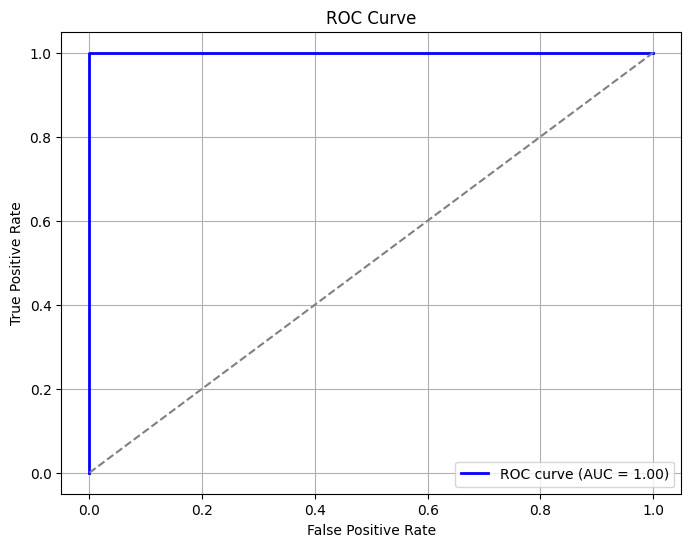

In [12]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 假设你的数据在 test_results.txt
test_results = pd.read_csv('runs/10000/test_results.txt', sep='\t', header=None, names=['url', 'true_label', 'pred_prob'])

# 检查一下原始标签数据
print(test_results['true_label'].unique())

# 移除无效数据（例如 'predict' 标签）
test_results = test_results[~test_results['true_label'].isin(['predict'])]

# 将标签转换为整数格式，并将 -1 转为 0
label_mapping = {'-1': 0, '1': 1}
test_results['true_numeric'] = test_results['true_label'].map(label_mapping)

# 确认转换后的标签
print(test_results['true_numeric'].unique())

# 确保没有缺失值
test_results = test_results.dropna(subset=['true_numeric'])

# 提取标签和预测概率
y_true_numeric = test_results['true_numeric'].astype(int)
y_scores = test_results['pred_prob'].astype(float)

# 计算ROC
fpr, tpr, thresholds = roc_curve(y_true_numeric, y_scores)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


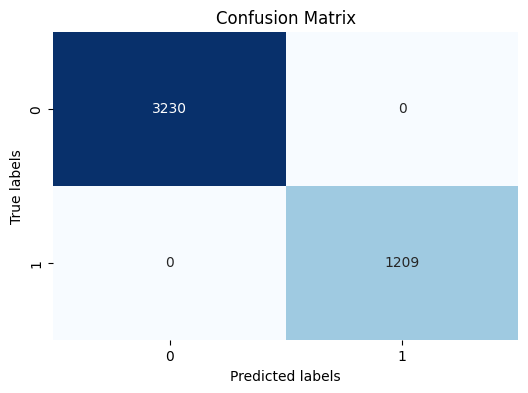

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      3230
   Malicious       1.00      1.00      1.00      1209

    accuracy                           1.00      4439
   macro avg       1.00      1.00      1.00      4439
weighted avg       1.00      1.00      1.00      4439



In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 假设test_results已经处理为数值的二分类标签数据
y_pred_binary = (y_scores >= 0.5).astype(int)

# 计算 confusion matrix
cm = confusion_matrix(y_true_numeric, y_pred_binary)

# 绘制 confusion matrix 热力图
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# 输出 classification report
report = classification_report(y_true_numeric, y_pred_binary, target_names=['Benign', 'Malicious'])
print(report)


In [15]:
test_results = pd.read_csv("runs/10000/test_results.txt", sep="\t")

In [17]:
# 重新读取测试结果
test_results = pd.read_csv("runs/10000/test_results.txt", sep="\t")

# 确认实际标签和预测标签列名
print(test_results.columns)

# 假设 test_results 有 'label_numeric' (真实标签) 和 'predict' (概率预测值)
y_true_numeric = test_results['label_numeric']
y_pred_binary = (test_results['predict'] > 0.5).astype(int)  # 阈值通常为0.5，具体视情况调整

# 再次画 confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true_numeric, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.show()

# 重新计算准确率
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_true_numeric, y_pred_binary))


Index(['label', 'predict', 'score'], dtype='object')


KeyError: 'label_numeric'

In [18]:
print(test_results.columns)


Index(['label', 'predict', 'score'], dtype='object')


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (2).

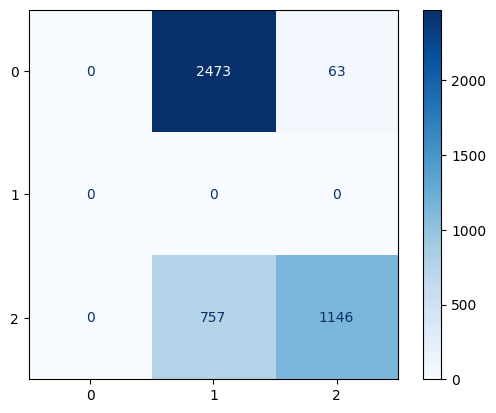

In [21]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# 读取数据
test_results = pd.read_csv("runs/10000/test_results.txt", sep="\t")

# 获取真实值和预测值
y_true_numeric = test_results['label'].astype(int)
y_pred_binary = (test_results['predict'].astype(float) > 0.5).astype(int)

# 绘制混淆矩阵
cm = confusion_matrix(y_true_numeric, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# 计算并打印准确率
accuracy = accuracy_score(y_true_numeric, y_pred_binary)
print("Accuracy:", accuracy)


In [22]:
label_mapping = {'benign': 0, 'phishing': 1, 'malware': 1, 'spam': 1}
data['label_numeric'] = data['label'].map(label_mapping)


In [23]:
test_results = pd.read_csv("runs/10000/test_results.txt", sep="\t")
test_results['label_numeric'] = test_results['label'].map(label_mapping)


In [33]:
print(test_results['label'].unique())

[]


In [36]:
test_results = pd.read_csv("runs/10000/test_results.txt", sep="\t")
print(test_results.head())
print(test_results['label'].unique())


   label  predict     score
0      1        1  0.722684
1      1       -1  0.143610
2      1       -1  0.377495
3      1        1  0.944343
4      1       -1  0.400219
[ 1 -1]


In [37]:
label_mapping = {-1: 0, 1: 1}
test_results['label_numeric'] = test_results['label'].map(label_mapping)

# 验证映射是否正确
print(test_results[['label', 'label_numeric']].head())


   label  label_numeric
0      1              1
1      1              1
2      1              1
3      1              1
4      1              1


In [38]:
print(test_results['label'].value_counts())


-1    2536
 1    1903
Name: label, dtype: int64


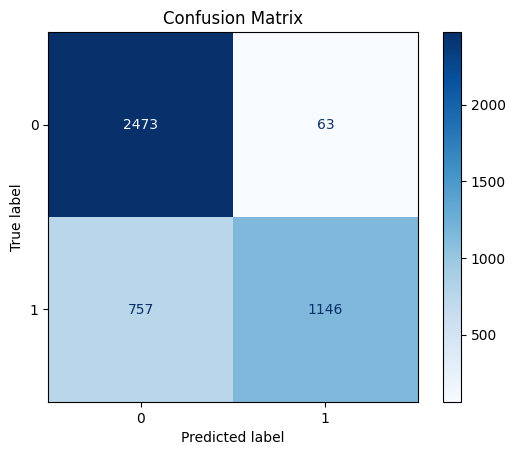

Accuracy: 0.8152737102951115


In [39]:
# 生成预测二分类结果
y_true_numeric = test_results['label_numeric']
y_pred_binary = (test_results['predict'] > 0.5).astype(int)

# 混淆矩阵
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true_numeric, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# 准确率
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true_numeric, y_pred_binary)
print("Accuracy:", accuracy)


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 读取所有parquet数据并合并
import glob
files = glob.glob('/home/kylelu/URLNet/DeepURLBench/urls_without_dns/*.parquet')
df_list = [pd.read_parquet(file) for file in files]
data = pd.concat(df_list, ignore_index=True)

print(f"合并后数据量: {len(data)}")

# 映射标签
label_mapping = {'benign': 0, 'phishing': 1, 'malware': 1, 'spam': 1}
data['label_numeric'] = data['label'].map(label_mapping)

# 删除空标签行
data = data.dropna(subset=['label_numeric'])

# 划分为训练集和测试集
train_data, test_data = train_test_split(
    data[['label_numeric', 'url']], 
    test_size=0.2, 
    random_state=42,
    stratify=data['label_numeric']
)

# 保存训练和测试文件
train_data.to_csv('train_full.txt', sep='\t', index=False, header=False)
test_data.to_csv('test_full.txt', sep='\t', index=False, header=False)

print(f"训练集大小: {len(train_data)}，测试集大小: {len(test_data)}")


合并后数据量: 22192924
训练集大小: 17754339，测试集大小: 4438585


In [4]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# 保存数据
train_data[['label_numeric', 'url']].to_csv('data/train_full.txt', sep='\t', index=False, header=False)
test_data[['label_numeric', 'url']].to_csv('data/test_full.txt', sep='\t', index=False, header=False)

print(f"训练集大小：{len(train_data)}, 测试集大小：{len(test_data)}")

FileNotFoundError: [Errno 2] No such file or directory: 'data/train_full.txt'

In [1]:
import tensorflow as tf

# 指定模型路径（注意路径前缀不带后缀名）
checkpoint_path = "~/URLNet/runs/10000/checkpoints/model-175"

# 创建一个新的图结构
graph = tf.Graph()

with graph.as_default():
    session_conf = tf.ConfigProto(allow_soft_placement=True)
    sess = tf.Session(config=session_conf)

    # 导入模型结构
    saver = tf.train.import_meta_graph(checkpoint_path + ".meta")

    # 加载保存的变量值到session
    saver.restore(sess, checkpoint_path)
    print("模型已成功加载")

    # 查看可用的operation和tensor（可选）
    for op in graph.get_operations():
        print(op.name)

    # 若你已知输入输出的tensor名字，例如:
    input_x = graph.get_tensor_by_name("input_x:0")  # 示例名字，具体应与你模型定义一致
    dropout_keep_prob = graph.get_tensor_by_name("dropout_keep_prob:0")
    predictions = graph.get_tensor_by_name("output/predictions:0")

    # 做预测示例
    feed_dict = {
        input_x: [[0, 1, 2, 3]],  # 示例输入，根据实际调整
        dropout_keep_prob: 1.0  # 预测时一般设为1.0
    }
    preds = sess.run(predictions, feed_dict)
    print(preds)

2025-06-02 22:38:29.261257: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2025-06-02 22:38:29.266303: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 4491600000 Hz
2025-06-02 22:38:29.267317: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x354057e0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2025-06-02 22:38:29.267327: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2025-06-02 22:38:29.268543: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2025-06-02 22:38:29.363621: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-06-02 22:38:29.3637

OSError: File ~/URLNet/runs/10000/checkpoints/model-175.meta does not exist.

In [5]:
import tensorflow as tf

# 修正后的模型路径
checkpoint_path = "/home/kylelu/llama/runs/full_datasetcheckpoints/model-812500"

# 创建TensorFlow图
graph = tf.Graph()

with graph.as_default():
    session_conf = tf.ConfigProto(allow_soft_placement=True)
    sess = tf.Session(config=session_conf)

    # 加载图结构
    saver = tf.train.import_meta_graph(checkpoint_path + ".meta")

    # 恢复变量
    saver.restore(sess, checkpoint_path)
    print("模型成功加载")

    # 检查operation名字 (可选)
    for op in graph.get_operations():
        print(op.name)

    # 根据你模型定义的变量名进行后续操作，例如预测


INFO:tensorflow:Restoring parameters from /home/kylelu/llama/runs/full_datasetcheckpoints/model-812500


2025-06-02 23:13:42.495887: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-06-02 23:13:42.496130: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: NVIDIA GeForce RTX 3090 major: 8 minor: 6 memoryClockRate(GHz): 1.8
pciBusID: 0000:01:00.0
2025-06-02 23:13:42.496419: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcudart.so.10.0'; dlerror: libcudart.so.10.0: cannot open shared object file: No such file or directory
2025-06-02 23:13:42.496580: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcublas.so.10.0'; dlerror: libcublas.so.10.0: cannot open shared object file: No such file or directory
2025-06-02 23:13:42.496634: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not loa

模型成功加载
input_x_char_seq
input_y
dropout_keep_prob
Const
embedding/random_uniform/shape
embedding/random_uniform/min
embedding/random_uniform/max
embedding/random_uniform/RandomUniform
embedding/random_uniform/sub
embedding/random_uniform/mul
embedding/random_uniform
embedding/char_seq_emb_w
embedding/char_seq_emb_w/Assign
embedding/char_seq_emb_w/read
embedding/embedding_lookup/axis
embedding/embedding_lookup
embedding/embedding_lookup/Identity
embedding/ExpandDims/dim
embedding/ExpandDims
char_conv_maxpool_3/Const
char_conv_maxpool_3/b
char_conv_maxpool_3/b/Assign
char_conv_maxpool_3/b/read
char_conv_maxpool_3/truncated_normal/shape
char_conv_maxpool_3/truncated_normal/mean
char_conv_maxpool_3/truncated_normal/stddev
char_conv_maxpool_3/truncated_normal/TruncatedNormal
char_conv_maxpool_3/truncated_normal/mul
char_conv_maxpool_3/truncated_normal
char_conv_maxpool_3/w
char_conv_maxpool_3/w/Assign
char_conv_maxpool_3/w/read
char_conv_maxpool_3/conv
char_conv_maxpool_3/BiasAdd
char_conv_

In [6]:
import tensorflow as tf

checkpoint_path = "/home/kylelu/llama/runs/full_datasetcheckpoints/model-812500"

graph = tf.Graph()

with graph.as_default():
    session_conf = tf.ConfigProto(allow_soft_placement=True)
    sess = tf.Session(config=session_conf)

    # 加载图结构
    saver = tf.train.import_meta_graph(checkpoint_path + ".meta")

    # 恢复模型参数
    saver.restore(sess, checkpoint_path)
    print("模型成功加载")

    # TensorBoard保存路径
    writer = tf.summary.FileWriter('/home/kylelu/llama/runs/tensorboard_graph', sess.graph)
    writer.close()


INFO:tensorflow:Restoring parameters from /home/kylelu/llama/runs/full_datasetcheckpoints/model-812500


2025-06-02 23:16:17.890798: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-06-02 23:16:17.891101: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: NVIDIA GeForce RTX 3090 major: 8 minor: 6 memoryClockRate(GHz): 1.8
pciBusID: 0000:01:00.0
2025-06-02 23:16:17.891401: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcudart.so.10.0'; dlerror: libcudart.so.10.0: cannot open shared object file: No such file or directory
2025-06-02 23:16:17.891450: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcublas.so.10.0'; dlerror: libcublas.so.10.0: cannot open shared object file: No such file or directory
2025-06-02 23:16:17.891498: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not loa

模型成功加载



In [7]:
import tensorflow as tf
from tensorflow.python.tools import inspect_checkpoint as chkp

checkpoint_path = "/home/kylelu/llama/runs/full_datasetcheckpoints/model-812500"

# 显示checkpoint中的变量
chkp.print_tensors_in_checkpoint_file(checkpoint_path, tensor_name='', all_tensors=False, all_tensor_names=True)


tensor_name:  beta1_power
tensor_name:  beta2_power
tensor_name:  char_conv_maxpool_3/b
tensor_name:  char_conv_maxpool_3/b/Adam
tensor_name:  char_conv_maxpool_3/b/Adam_1
tensor_name:  char_conv_maxpool_3/w
tensor_name:  char_conv_maxpool_3/w/Adam
tensor_name:  char_conv_maxpool_3/w/Adam_1
tensor_name:  char_conv_maxpool_4/b
tensor_name:  char_conv_maxpool_4/b/Adam
tensor_name:  char_conv_maxpool_4/b/Adam_1
tensor_name:  char_conv_maxpool_4/w
tensor_name:  char_conv_maxpool_4/w/Adam
tensor_name:  char_conv_maxpool_4/w/Adam_1
tensor_name:  char_conv_maxpool_5/b
tensor_name:  char_conv_maxpool_5/b/Adam
tensor_name:  char_conv_maxpool_5/b/Adam_1
tensor_name:  char_conv_maxpool_5/w
tensor_name:  char_conv_maxpool_5/w/Adam
tensor_name:  char_conv_maxpool_5/w/Adam_1
tensor_name:  char_conv_maxpool_6/b
tensor_name:  char_conv_maxpool_6/b/Adam
tensor_name:  char_conv_maxpool_6/b/Adam_1
tensor_name:  char_conv_maxpool_6/w
tensor_name:  char_conv_maxpool_6/w/Adam
tensor_name:  char_conv_maxpool

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# 加载数据
data = pd.read_csv('/home/kylelu/llama/runs/full_dataset/full_dataseteval_logs.csv')

# 检查数据是否包含真实标签和预测概率列
print(data.head())

# 提取真实标签与预测概率
y_true = data['true_label']
y_scores = data['predicted_score']

# 计算ROC曲线和AUC值
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# 计算预测标签（阈值0.5）
y_pred = (y_scores >= 0.5).astype(int)

# 计算并绘制混淆矩阵
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign (0)', 'Malicious (1)'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/home/kylelu/llama/runs/full_dataset/full_dataseteval_logs.csv'